## Analyzing with postal code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


rental_data = pd.read_csv('../data/processed/cleaned_rental_data_with_postalcode.csv')
crime_data = pd.read_csv('../data/processed/crime_with_postalcode_cityname.csv')
print(f"The length of dataframe: {len(rental_data)}")
print(f"The length of dataframe: {len(crime_data)}")

The length of dataframe: 6521
The length of dataframe: 29452


In [2]:
postal_avg_price = rental_data.groupby('postal_code')['min_price'].mean().reset_index(name='postal_avg_price')
postal_avg_price

,postal_code,postal_avg_price
0,90001,2966.666667
1,90002,1954.500000
2,90003,3137.434783
3,90004,1985.928571
4,90005,2063.033333
...,...,...
205,93536,2814.451613
206,93550,2252.123077
207,93551,3199.444444
208,93552,2888.500000


In [3]:
crime_agg = crime_data.groupby('postal_code').size().reset_index(name='crime_count')
crime_agg = crime_agg[crime_agg['crime_count'] >0]
crime_agg

,postal_code,crime_count
0,90001.0,106
1,90002.0,389
2,90003.0,793
3,90004.0,527
4,90005.0,312
...,...,...
108,91302.0,1
109,91340.0,147
110,91504.0,16
111,91505.0,8


In [4]:
merged_data = pd.merge(postal_avg_price, crime_agg, on='postal_code', how='left')
merged_data['crime_count'] = merged_data['crime_count'].fillna(0)
merged_data

,postal_code,postal_avg_price,crime_count
0,90001,2966.666667,106.0
1,90002,1954.500000,389.0
2,90003,3137.434783,793.0
3,90004,1985.928571,527.0
4,90005,2063.033333,312.0
...,...,...,...
205,93536,2814.451613,0.0
206,93550,2252.123077,0.0
207,93551,3199.444444,0.0
208,93552,2888.500000,0.0


### The propotion of weight TBD (refer to online documents)

In [5]:
crime_weights = {
    'violent_crime': 6,
    'human_trafficking': 5,
    'sexual_offense': 5,
    'assault': 4,
    'theft': 3,
    'fraud': 3,
    'public_order': 2,
    'animal_cruelty': 2,
    'other': 1
}

# Add a weighted score column based on the crime category
crime_data['crime_weight'] = crime_data['crime_category'].map(crime_weights)

# Calculate total weighted crime score per postal code
weighted_crime_score = crime_data.groupby('postal_code')['crime_weight'].sum().reset_index()
weighted_crime_score.rename(columns={'crime_weight': 'weighted_crime_score'}, inplace=True)

merged_data = pd.merge(merged_data, weighted_crime_score, on='postal_code', how='left')
merged_data['weighted_crime_score'] = merged_data['weighted_crime_score'].fillna(0)
print(f"Total Data Rows: {len(merged_data)}")
merged_data

Total Data Rows: 210


,postal_code,postal_avg_price,crime_count,weighted_crime_score
0,90001,2966.666667,106.0,311.0
1,90002,1954.500000,389.0,1137.0
2,90003,3137.434783,793.0,2356.0
3,90004,1985.928571,527.0,1472.0
4,90005,2063.033333,312.0,872.0
...,...,...,...,...
205,93536,2814.451613,0.0,0.0
206,93550,2252.123077,0.0,0.0
207,93551,3199.444444,0.0,0.0
208,93552,2888.500000,0.0,0.0


In [6]:
avg_property_rating = rental_data.groupby('postal_code')['Property Rating'].mean().reset_index()
avg_property_rating.rename(columns={'property_rating': 'avg_property_rating'}, inplace=True)

In [7]:
merged_data = pd.merge(merged_data, avg_property_rating, on='postal_code', how='left')
merged_data

,postal_code,postal_avg_price,crime_count,weighted_crime_score,Property Rating
0,90001,2966.666667,106.0,311.0,0.000000
1,90002,1954.500000,389.0,1137.0,0.500000
2,90003,3137.434783,793.0,2356.0,0.913043
3,90004,1985.928571,527.0,1472.0,3.764286
4,90005,2063.033333,312.0,872.0,4.680000
...,...,...,...,...,...
205,93536,2814.451613,0.0,0.0,0.570968
206,93550,2252.123077,0.0,0.0,0.447692
207,93551,3199.444444,0.0,0.0,0.474074
208,93552,2888.500000,0.0,0.0,0.161111


In [8]:
avg_total_security = rental_data.groupby('postal_code')['total_security_amenities'].mean().reset_index()
avg_total_security.rename(columns={'total_security_amenities': 'avg_total_security_amenities'}, inplace=True)

In [9]:
merged_data = pd.merge(merged_data, avg_total_security, on='postal_code', how='left')
merged_data

,postal_code,postal_avg_price,crime_count,weighted_crime_score,Property Rating,avg_total_security_amenities
0,90001,2966.666667,106.0,311.0,0.000000,0.000000
1,90002,1954.500000,389.0,1137.0,0.500000,0.333333
2,90003,3137.434783,793.0,2356.0,0.913043,0.347826
3,90004,1985.928571,527.0,1472.0,3.764286,2.250000
4,90005,2063.033333,312.0,872.0,4.680000,2.466667
...,...,...,...,...,...,...
205,93536,2814.451613,0.0,0.0,0.570968,0.274194
206,93550,2252.123077,0.0,0.0,0.447692,0.476923
207,93551,3199.444444,0.0,0.0,0.474074,0.185185
208,93552,2888.500000,0.0,0.0,0.161111,0.388889


In [10]:
amenity_columns = rental_data.loc[:, 'security':'patrol'].columns
amenity_aggregated = rental_data.groupby('postal_code')[amenity_columns].sum().reset_index()

In [11]:
merged_data = pd.merge(merged_data, amenity_aggregated, on='postal_code', how='left')
merged_data

,postal_code,postal_avg_price,crime_count,weighted_crime_score,Property Rating,avg_total_security_amenities,security,gated,surveillance,camera,...,access control,security system,electronic locks,monitoring,fenced,safe,locked,protected,secure entry,patrol
0,90001,2966.666667,106.0,311.0,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90002,1954.500000,389.0,1137.0,0.500000,0.333333,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,90003,3137.434783,793.0,2356.0,0.913043,0.347826,0,4,0,0,...,0,0,0,0,4,0,0,0,0,0
3,90004,1985.928571,527.0,1472.0,3.764286,2.250000,16,15,0,1,...,0,0,0,1,2,0,0,0,0,1
4,90005,2063.033333,312.0,872.0,4.680000,2.466667,14,22,0,0,...,1,0,0,0,1,2,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,93536,2814.451613,0.0,0.0,0.570968,0.274194,6,3,0,0,...,0,0,0,0,4,0,0,0,0,1
206,93550,2252.123077,0.0,0.0,0.447692,0.476923,10,12,1,0,...,0,0,0,0,4,0,0,0,0,2
207,93551,3199.444444,0.0,0.0,0.474074,0.185185,0,3,0,0,...,0,0,0,0,1,0,0,0,0,0
208,93552,2888.500000,0.0,0.0,0.161111,0.388889,0,3,0,0,...,0,0,0,0,2,0,0,0,0,1


#### Overall postal code

#### Conducting linear regression

In [14]:
X = merged_data[['Property Rating']]
y = merged_data['avg_total_security_amenities']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
import numpy as np

Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
# Identify the indices of outliers
outlier_indices = y[(y < lower_bound) | (y > upper_bound)].index

# Get the removed rows
removed_rows = X.loc[outlier_indices]
removed_targets = y.loc[outlier_indices]

# Print outlier information
print(f"Outlier Indices: {outlier_indices.tolist()}")
print(f"Removed Rows:\n{removed_rows}")
print(f"Removed Target Values:\n{removed_targets}")

# Optionally save the removed rows to a file for future reference
removed_data = pd.concat([removed_rows, removed_targets], axis=1)
removed_data.to_csv("removed_outliers.csv", index=True)

# Remove rows where y contains outliers
non_outliers = (y >= lower_bound) & (y <= upper_bound)
X_no_outliers = X[non_outliers]
y_no_outliers = y[non_outliers]
filtered_data = pd.concat([X_no_outliers, y_no_outliers], axis=1)
print(f"Number of rows after removing outliers: {len(y)}, {len(y_no_outliers)}")

# Split the data again after outlier removal
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

Outlier Indices: [3, 4, 5, 6, 8, 11, 12, 13, 15, 16, 26, 47, 48, 51, 113, 178]
Removed Rows:
     Property Rating
3           3.764286
4           4.680000
5           4.350000
6           4.064286
8           4.672727
11          4.722222
12          4.700000
13          4.765000
15          4.836842
16          3.180000
26          3.159843
47          4.500000
48          4.900000
51          3.000000
113         4.475000
178         2.160000
Removed Target Values:
3      2.250000
4      2.466667
5      2.214286
6      2.857143
8      2.181818
11     3.222222
12     2.461538
13     2.350000
15     3.210526
16     2.700000
26     2.401575
47     3.000000
48     3.000000
51     9.000000
113    2.500000
178    3.600000
Name: avg_total_security_amenities, dtype: float64
Number of rows after removing outliers: 210, 194


Linear Regression R^2 Score: 0.5706516685683234


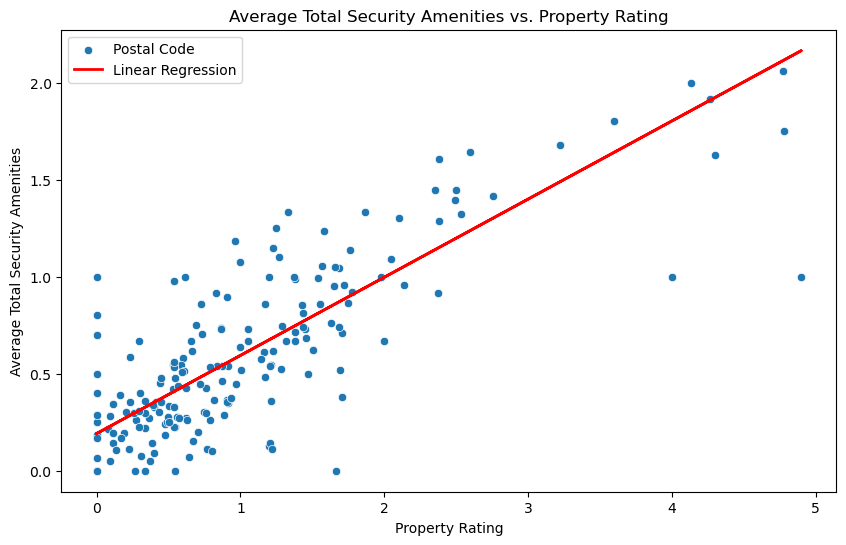

In [16]:
# Perform Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_score = lin_reg.score(X_test, y_test)

# Print model scores
print("Linear Regression R^2 Score:", lin_reg_score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Property Rating', y='avg_total_security_amenities', data=filtered_data, label='Postal Code')
plt.plot(X['Property Rating'], lin_reg.predict(X), color='red', label='Linear Regression', linewidth=2)
plt.title('Average Total Security Amenities vs. Property Rating')
plt.xlabel('Property Rating')
plt.ylabel('Average Total Security Amenities')
plt.legend()
plt.show()

#### Define which postal code is "High Crime" area

In [17]:
# merged_data['high_crime'] = (merged_data['crime_count'] > merged_data['crime_count'].median()).astype(int)
merged_data['high_crime'] = (merged_data['weighted_crime_score'] > merged_data['weighted_crime_score'].median()).astype(int)
high_crime_data = merged_data[merged_data['high_crime'] == 1]
high_crime_data 

,postal_code,postal_avg_price,crime_count,weighted_crime_score,Property Rating,avg_total_security_amenities,security,gated,surveillance,camera,...,security system,electronic locks,monitoring,fenced,safe,locked,protected,secure entry,patrol,high_crime
0,90001,2966.666667,106.0,311.0,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,90002,1954.500000,389.0,1137.0,0.500000,0.333333,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,90003,3137.434783,793.0,2356.0,0.913043,0.347826,0,4,0,0,...,0,0,0,4,0,0,0,0,0,1
3,90004,1985.928571,527.0,1472.0,3.764286,2.250000,16,15,0,1,...,0,0,1,2,0,0,0,0,1,1
4,90005,2063.033333,312.0,872.0,4.680000,2.466667,14,22,0,0,...,0,0,0,1,2,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,91210,5275.000000,2.0,6.0,1.250000,1.250000,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
162,91302,4000.283333,1.0,1.0,0.166667,0.166667,2,5,0,0,...,0,0,0,2,0,0,0,0,0,1
163,91340,2831.153846,147.0,423.0,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
169,91504,3215.103448,16.0,47.0,1.627586,0.758621,0,10,0,0,...,0,0,0,0,0,0,0,0,3,1


### Linear Regression for high crime area 

In [20]:
X = high_crime_data[['Property Rating']]
y = high_crime_data['avg_total_security_amenities']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
import numpy as np

Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
# Identify the indices of outliers
outlier_indices = y[(y < lower_bound) | (y > upper_bound)].index

# Get the removed rows
removed_rows = X.loc[outlier_indices]
removed_targets = y.loc[outlier_indices]

# Print outlier information
print(f"Outlier Indices: {outlier_indices.tolist()}")
print(f"Removed Rows:\n{removed_rows}")
print(f"Removed Target Values:\n{removed_targets}")

# Optionally save the removed rows to a file for future reference
removed_data = pd.concat([removed_rows, removed_targets], axis=1)
removed_data.to_csv("removed_outliers.csv", index=True)

# Remove rows where y contains outliers
non_outliers = (y >= lower_bound) & (y <= upper_bound)
X_no_outliers = X[non_outliers]
y_no_outliers = y[non_outliers]
filtered_data = pd.concat([X_no_outliers, y_no_outliers], axis=1)
print(f"Number of rows after removing outliers: {len(y)}, {len(y_no_outliers)}")

# Split the data again after outlier removal
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

Outlier Indices: [11, 15, 51]
Removed Rows:
    Property Rating
11         4.722222
15         4.836842
51         3.000000
Removed Target Values:
11    3.222222
15    3.210526
51    9.000000
Name: avg_total_security_amenities, dtype: float64
Number of rows after removing outliers: 96, 93


Linear Regression R^2 Score: 0.8856985427053707


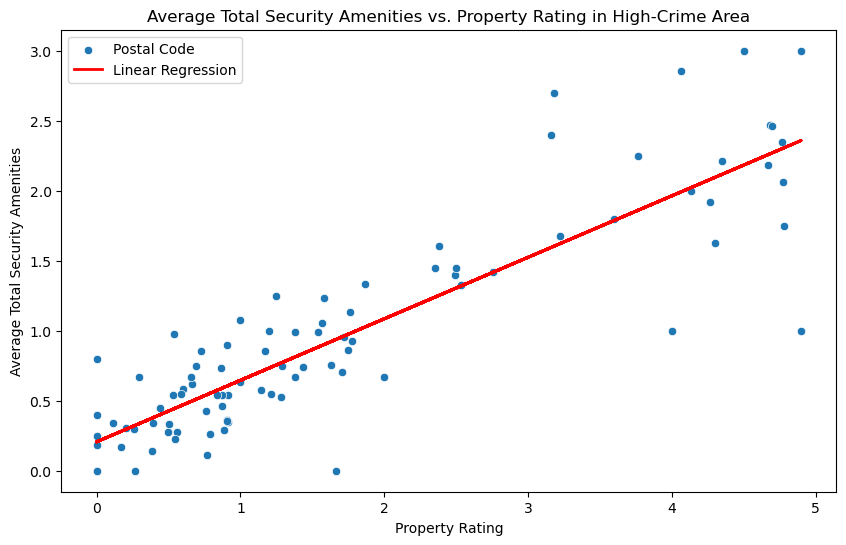

In [22]:
# Perform Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_score = lin_reg.score(X_test, y_test)

# Print model scores
print("Linear Regression R^2 Score:", lin_reg_score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Property Rating', y='avg_total_security_amenities', data=filtered_data, label='Postal Code')
plt.plot(X['Property Rating'], lin_reg.predict(X), color='red', label='Linear Regression', linewidth=2)
plt.title('Average Total Security Amenities vs. Property Rating in High-Crime Area')
plt.xlabel('Property Rating')
plt.ylabel('Average Total Security Amenities')
plt.legend()
plt.show()

### Oversee whether amenities play a crucial role in tenant satisfaction, especially in areas with higher crime levels (include all postal_code)

Number of Postal Codes in Each Crime Level:
crime_level
Very Low     114
Low            8
Medium        18
High          19
Very High     51
Name: postal_code, dtype: int64


/var/folders/kt/rxtjq6754bq3bkmvtqmr43f40000gn/T/ipykernel_82777/3243021189.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  postal_code_counts = merged_data.groupby('crime_level')['postal_code'].nunique()
/var/folders/kt/rxtjq6754bq3bkmvtqmr43f40000gn/T/ipykernel_82777/3243021189.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = merged_data.groupby(['crime_level', 'has_amenities'])['Property Rating'].mean().unstack()
/var/folders/kt/rxtjq6754bq3bkmvtqmr43f40000gn/T/ipykernel_82777/3243021189.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

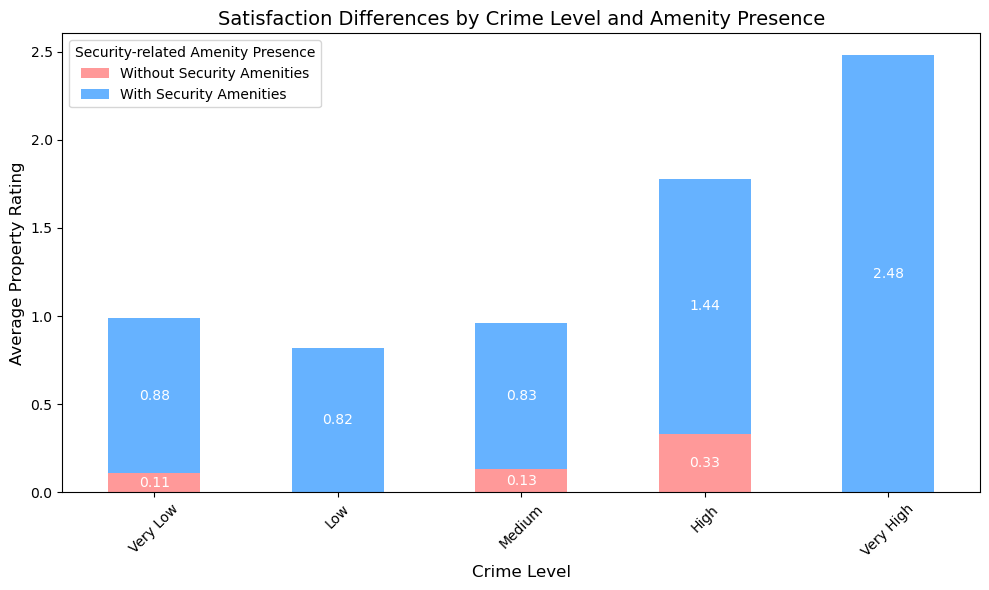

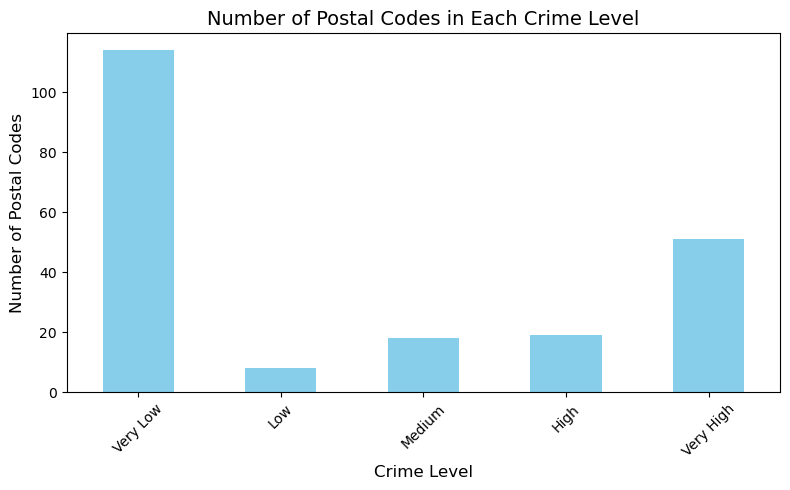

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Replace zeros in weighted_crime_score to avoid logarithmic errors
merged_data['weighted_crime_score'] = merged_data['weighted_crime_score'].replace(0, 0.1)

# Define min and max values for logarithmic scaling
min_value = merged_data['weighted_crime_score'].min()
max_value = merged_data['weighted_crime_score'].max()

# Check for valid range
if min_value <= 0 or max_value <= 0:
    raise ValueError("All weighted_crime_score values must be positive for logarithmic scaling.")

# Create logarithmic bins
num_bins = 6
bins = np.logspace(np.log10(min_value), np.log10(max_value), num=num_bins)

# Ensure bins are unique and sorted
bins = np.unique(bins)

# Define labels (number of labels = number of bins - 1)
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Bin the data
merged_data['crime_level'] = pd.cut(
    merged_data['weighted_crime_score'],
    bins=bins,
    labels=labels,
    include_lowest=True  # Ensures the lowest value is included in the first bin
)

# Count unique postal codes per crime level
postal_code_counts = merged_data.groupby('crime_level')['postal_code'].nunique()
print("Number of Postal Codes in Each Crime Level:")
print(postal_code_counts)

# Group by crime level and amenity presence, then calculate average satisfaction
merged_data['has_amenities'] = merged_data['avg_total_security_amenities'] > 0
grouped = merged_data.groupby(['crime_level', 'has_amenities'])['Property Rating'].mean().unstack()

# Define custom colors for the stacked bars
custom_colors = ['#FF9999', '#66B2FF']  # Example colors: light red for "Without Amenities", light blue for "With Amenities"

# Stacked Bar Chart with Custom Colors
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add annotations for average satisfaction values
for i, (level, row) in enumerate(grouped.iterrows()):
    for j, val in enumerate(row):
        if not pd.isna(val):
            ax.text(i, row.cumsum()[j] - (row[j] / 2), f"{val:.2f}", ha="center", va="center", fontsize=10, color="white")

# Add title and labels
plt.title("Satisfaction Differences by Crime Level and Amenity Presence", fontsize=14)
plt.xlabel("Crime Level", fontsize=12)
plt.ylabel("Average Property Rating", fontsize=12)
plt.legend(['Without Security Amenities', 'With Security Amenities'], title="Security-related Amenity Presence", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the stacked bar chart
plt.show()

# Plot postal code counts for additional context
postal_code_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Number of Postal Codes in Each Crime Level", fontsize=14)
plt.xlabel("Crime Level", fontsize=12)
plt.ylabel("Number of Postal Codes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Random Forest Model for multiple features in high-crime areas

In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
X = high_crime_data[['crime_count', 'weighted_crime_score', 'avg_total_security_amenities', 'postal_avg_price'] + list(amenity_columns)]
y = high_crime_data['Property Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest Regressor
model = RandomForestRegressor(random_state=4)
model.fit(X_train, y_train)
rf_reg_predictions = model.predict(X_test)
# rf_reg_score = rf_reg.score(X_test, y_test)


rf_mae = mean_absolute_error(y_test, rf_reg_predictions)
rf_rmse = sqrt(mean_squared_error(y_test, rf_reg_predictions))
rf_mape = (abs(y_test - rf_reg_predictions) / y_test).mean() * 100
rf_r2 = r2_score(y_test, rf_reg_predictions)

print("\nRandom Forest Regression Metrics:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"MAPE: {rf_mape}%")
print(f"R-squared: {rf_r2}")


Random Forest Regression Metrics:
MAE: 0.3985264299353577
RMSE: 0.4936183700312508
MAPE: inf%
R-squared: 0.9080757361336598


                         Feature  Importance  Importance (%)
2   avg_total_security_amenities    0.815420       81.542012
5                          gated    0.058237        5.823683
3               postal_avg_price    0.049724        4.972443
10             controlled access    0.013661        1.366080
18                        fenced    0.011911        1.191113
1           weighted_crime_score    0.011853        1.185283
0                    crime_count    0.011788        1.178850
17                    monitoring    0.007413        0.741294
23                        patrol    0.007099        0.709877
4                       security    0.004802        0.480191
11                 key fob entry    0.004252        0.425166
12                  night patrol    0.001894        0.189450
8                          alarm    0.000986        0.098609
6                   surveillance    0.000493        0.049274
7                         camera    0.000236        0.023588
16              electron

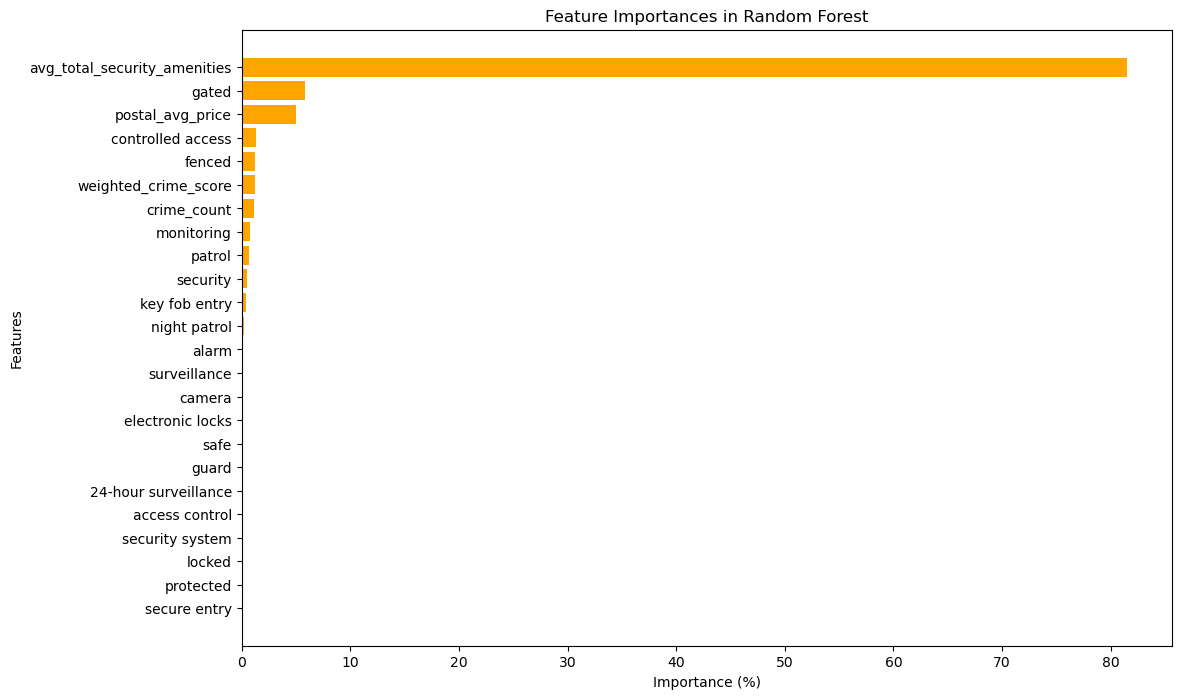

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# After training the Random Forest model
# Feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Normalize to get percentages
importance_df['Importance (%)'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance (%)'], color='orange')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()

### Random Forest Regression for each security amenity as feature

In [54]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
X = high_crime_data[amenity_columns]
y = high_crime_data['Property Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Fit a Random Forest Regressor
model = RandomForestRegressor(random_state=15)
model.fit(X_train, y_train)
rf_reg_predictions = model.predict(X_test)
# rf_reg_score = rf_reg.score(X_test, y_test)

rf_mae = mean_absolute_error(y_test, rf_reg_predictions)
rf_rmse = sqrt(mean_squared_error(y_test, rf_reg_predictions))
rf_mape = (abs(y_test - rf_reg_predictions) / y_test).mean() * 100
rf_r2 = r2_score(y_test, rf_reg_predictions)

print("\nRandom Forest Regression Metrics:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"MAPE: {rf_mape}%")
print(f"R-squared: {rf_r2}")


Random Forest Regression Metrics:
MAE: 0.70041621773522
RMSE: 0.8715407856488334
MAPE: inf%
R-squared: 0.6945435107708489


                 Feature  Importance  Importance (%)
6      controlled access    0.292922       29.292166
1                  gated    0.162404       16.240436
14                fenced    0.122134       12.213364
7          key fob entry    0.111980       11.198018
8           night patrol    0.094247        9.424654
0               security    0.089152        8.915230
19                patrol    0.054232        5.423218
2           surveillance    0.045342        4.534166
13            monitoring    0.010829        1.082857
15                  safe    0.008861        0.886078
17             protected    0.005047        0.504654
10        access control    0.001462        0.146180
12      electronic locks    0.000831        0.083135
3                 camera    0.000291        0.029118
18          secure entry    0.000266        0.026603
4                  alarm    0.000001        0.000124
5                  guard    0.000000        0.000000
9   24-hour surveillance    0.000000        0.

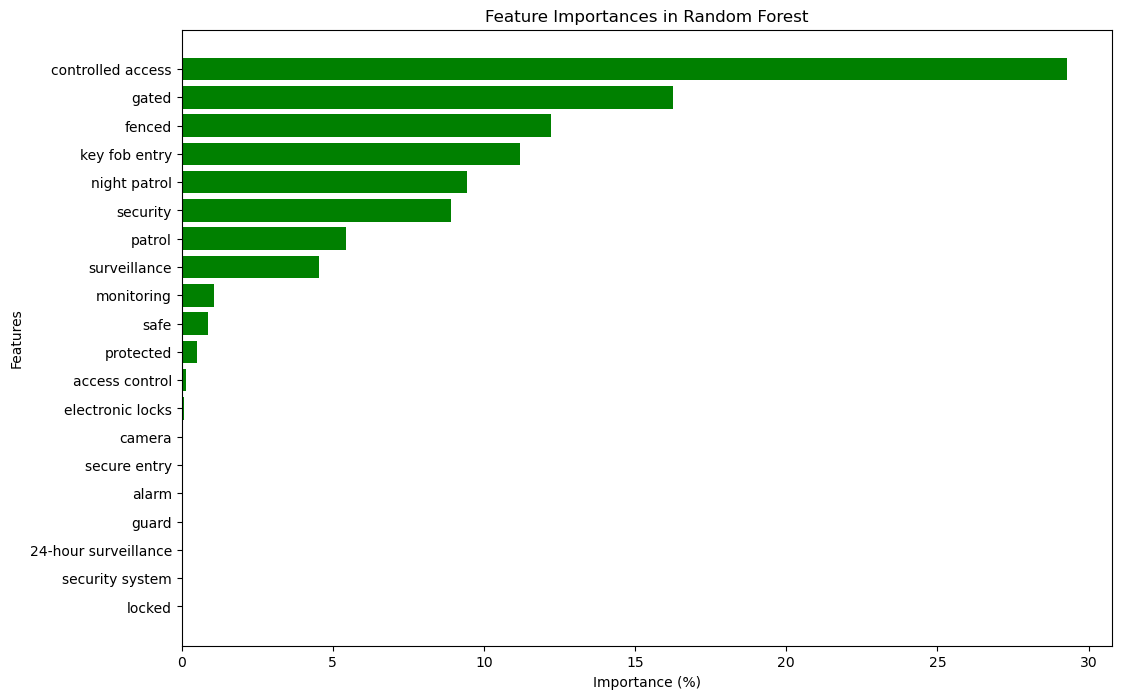

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# After training the Random Forest model
# Feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Normalize to get percentages
importance_df['Importance (%)'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance (%)'], color='green')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()